In [64]:
%matplotlib inline
import pandas as pd

In [65]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [66]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [67]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
2,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
3,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
4,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN


### What are the ten most common movie names of all time?

In [68]:
titles['title'].value_counts().head(10)

Hamlet                  19
Macbeth                 15
Carmen                  14
Othello                 11
Maya                    11
The Three Musketeers    11
The Outsider            11
Hero                    10
Anna                    10
Honeymoon               10
Name: title, dtype: int64

### Which three years of the 1930s saw the most films released?

In [69]:
in_1930s = titles['year'] // 10 * 10 == 1930
titles_1930 = titles[in_1930s]
titles_1930['year'].value_counts().head(3)

1937    1187
1936    1130
1938    1125
Name: year, dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

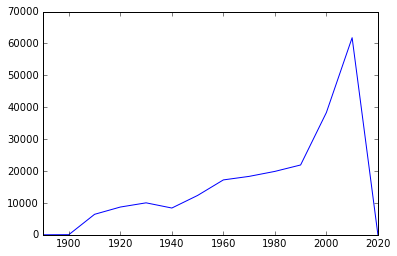

In [70]:
decades = titles.copy()
decades['decade'] = decades['year'] // 10 * 10 
decades = decades[['title', 'decade']]
decades = decades['decade'].value_counts()
decades.sort_index().plot()


### Plot the number of "Hamlet" films made each decade.

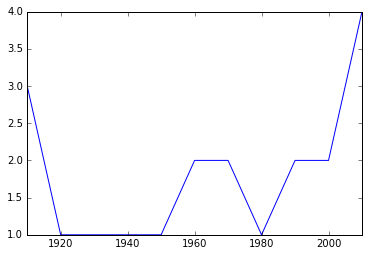

In [71]:
is_hamlet = titles['title'] == 'Hamlet'
decades = titles.copy()
decades['decade'] = decades['year'] // 10 * 10
decades = decades[['title', 'decade']]
decades = decades[is_hamlet]
decades['decade'].value_counts().sort_index().plot()

### Plot the number of "Rustler" characters in each decade of the history of film.

In [72]:
decades = cast.copy()
decades['decade'] = decades['year'] // 10 * 10 

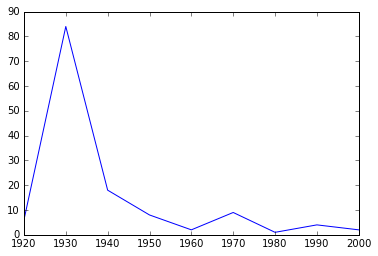

In [73]:
is_rustler = decades['character']=="Rustler"
decades = decades[is_rustler]
decades['decade'].value_counts().sort_index().plot()

### Plot the number of "Hamlet" characters each decade.

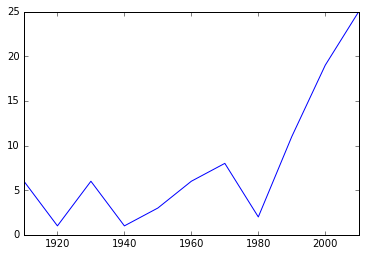

In [74]:
decades = cast.copy()
decades['decade'] = decades['year'] // 10 * 10
is_hamlet = decades['character']=='Hamlet'
decades = decades[is_hamlet]
decades['decade'].value_counts().sort_index().plot()

### What are the 11 most common character names in movie history?

In [75]:
cast['character'].value_counts().head(11)

Himself        18981
Dancer         11578
Extra           9941
Reporter        7877
Doctor          7185
Student         6719
Policeman       6687
Party Guest     6459
Nurse           6394
Bartender       6358
Minor Role      6113
Name: character, dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [76]:
is_herself = cast['character']=='Herself'
cast.loc[is_herself, 'name'].value_counts().head(10)

Joyce Brothers        14
Queen Elizabeth II    11
Margaret Thatcher      7
Mary Jo Pehl           7
Joan Rivers            6
Marilyn Monroe         5
Bunny Yeager           5
Rekha                  5
Jane Fonda             5
Kareena Kapoor         5
Name: name, dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [77]:
is_herself = cast['character']=='Himself'
cast.loc[is_herself, 'name'].value_counts().head(10)

Adolf Hitler             96
Richard Nixon            43
Ronald Reagan            34
John F. Kennedy          27
Ron Jeremy               24
George W. Bush           22
Winston Churchill        21
Bill Clinton             20
Benito Mussolini         20
Franklin D. Roosevelt    20
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [78]:
in_1945 = cast['year']==1945
cast.loc[in_1945, 'name'].value_counts()

Emmett Vogan              39
Sam (II) Harris           30
Harold Miller             29
Bess Flowers              28
Nolan Leary               27
Frank O'Connor            26
Franklyn Farnum           25
Larry Steers              25
Tom London                24
Charles Sullivan          24
Edmund Cobb               24
Herman Hack               24
Pierre Watkin             24
Bud Osborne               23
Addison Richards          23
Horace B. Carpenter       23
Budd Buster               22
Byron Foulger             22
Kenner G. Kemp            22
Arthur Loft               22
Chester Clute             22
Lee Phelps                22
Jack Ingram               22
James Conaty              21
Jack O'Shea               21
Rex Lease                 21
Edward Gargan             21
Milton Kibbee             21
Al Ferguson               21
Eddie Hall                20
                          ..
Inge W?rn                  1
Laird Cregar               1
Ralph Miele                1
Robert (IV) Ro

### Which actors or actresses appeared in the most movies in the year 1985?

In [79]:
in_1985 = cast['year']==1985
cast.loc[in_1985, 'name'].value_counts()

Mammootty                      21
Shakti Kapoor                  19
Sukumari                       19
Lou Scheimer                   15
Mohanlal                       15
Aruna Irani                    14
Raj Babbar                     14
Rajesh Khanna                  13
Deven Verma                    13
Jagdish Raj                    12
Satyendra Kapoor               12
Asrani                         12
Pinchoo Kapoor                 12
Om Shivpuri                    12
Innocent Vareed Thekkethala    11
Danny Denzongpa                11
Thilakan                       11
Sharat Saxena                  10
Iftekhar                       10
Madan Puri                     10
Yunus Parvez                   10
Shobana                        10
Kulbhushan Kharbanda           10
Jagathi Sreekumar              10
Rati Agnihotri                 10
Vikas Anand                     9
Smita Patil                     9
Huma Khan                       9
Lalu Alex                       9
Mithun Chakrab

### Plot how many roles Mammootty has played in each year of his career.

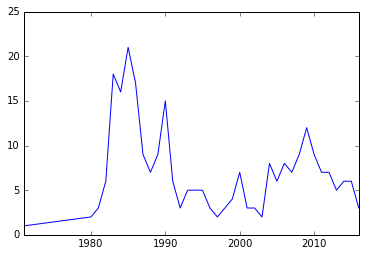

In [80]:
is_mammooty = cast['name'] == "Mammootty"
cast.loc[is_mammooty, 'year'].value_counts().sort_index().plot()

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [81]:
pattern = "Patron in"
with_patron_in = cast['character'].str.startswith(pattern)
cast.loc[with_patron_in, 'character'].value_counts().head(10)

Patron in Frisky Rabbit         16
Patron in Chinese Restaurant     9
Patron in the Coffee House       9
Patron in Billiard Parlor        5
Patron in Bar                    4
Patron in restaurant             3
Patron in Restaurant             3
Patron in cabaret                3
Patron in Club                   3
Patron in Quiet Bar              2
Name: character, dtype: int64

### What are the 10 most frequent roles that start with the word "Science"?

In [82]:
pattern = "Science"
starts_with_science = cast['character'].str.startswith(pattern)
cast.loc[starts_with_science, 'character'].value_counts().head(10)

Science Teacher         56
Science Student          9
Science Fair Student     9
Science Reporter         5
Science Promo Cadet      5
Science Fair Judge       5
Science Club Member      5
Science Kid              4
Science Fair Kid         3
Science Fair Teacher     3
Name: character, dtype: int64

### Plot the n-values of the roles that Judi Dench has played over her career.

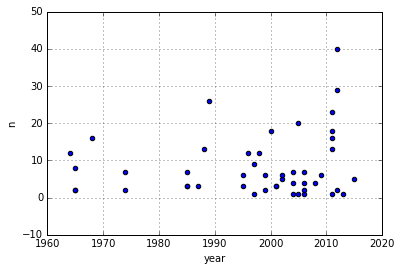

In [83]:
is_jdench = cast['name'] == "Judi Dench"
cast[is_jdench].dropna().sort_values('year').plot(x='year', y='n', kind='scatter', grid=True)


### Plot the n-values of Cary Grant's roles through his career.

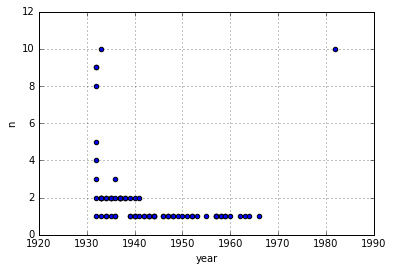

In [84]:
is_cgrant = cast['name'] == "Cary Grant"
cast[is_cgrant].dropna().sort_values('year').plot(x='year', y='n', kind='scatter', grid=True)

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

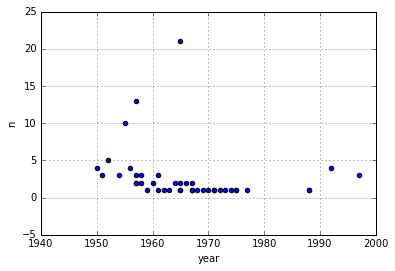

In [85]:
is_spoitier = cast['name'] == "Sidney Poitier"
cast[is_spoitier].dropna().sort_values('year').plot(x='year', y='n', kind='scatter', grid=True)

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [86]:
in_1950s = cast['year'] // 10 == 195
has_leading = cast.n == 1
cast.loc[in_1950s&has_leading, 'type'].value_counts()

actor      6494
actress    2881
Name: type, dtype: int64

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [87]:
in_1950s = cast['year'] // 10 == 195
has_supporting = cast.n == 2
cast.loc[in_1950s&has_supporting, 'type'].value_counts()

actress    4481
actor      4462
Name: type, dtype: int64